## Import Data

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [311]:
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv", header = 0,low_memory=False)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [309]:
df.shape

(194673, 38)

There are 38 columns and 194673 rows

In [6]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

## Data Preprocessing

### Select attributes

In [333]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [680]:
df2 = df1.set_index("INCKEY")

### Fix inconsistancy

In [596]:
df['UNDERINFL'].replace("N", "0", inplace=True)
df['UNDERINFL'].replace("Y", "1", inplace=True)

### Identify and handle missing values

In [336]:
df2.isnull().sum()

SEVERITYCODE        0
X                5334
Y                5334
ADDRTYPE         1926
COLLISIONTYPE    4904
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
INCDATE             0
JUNCTIONTYPE     6329
SDOT_COLCODE        0
UNDERINFL        4884
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
ST_COLCODE         18
HITPARKEDCAR        0
dtype: int64

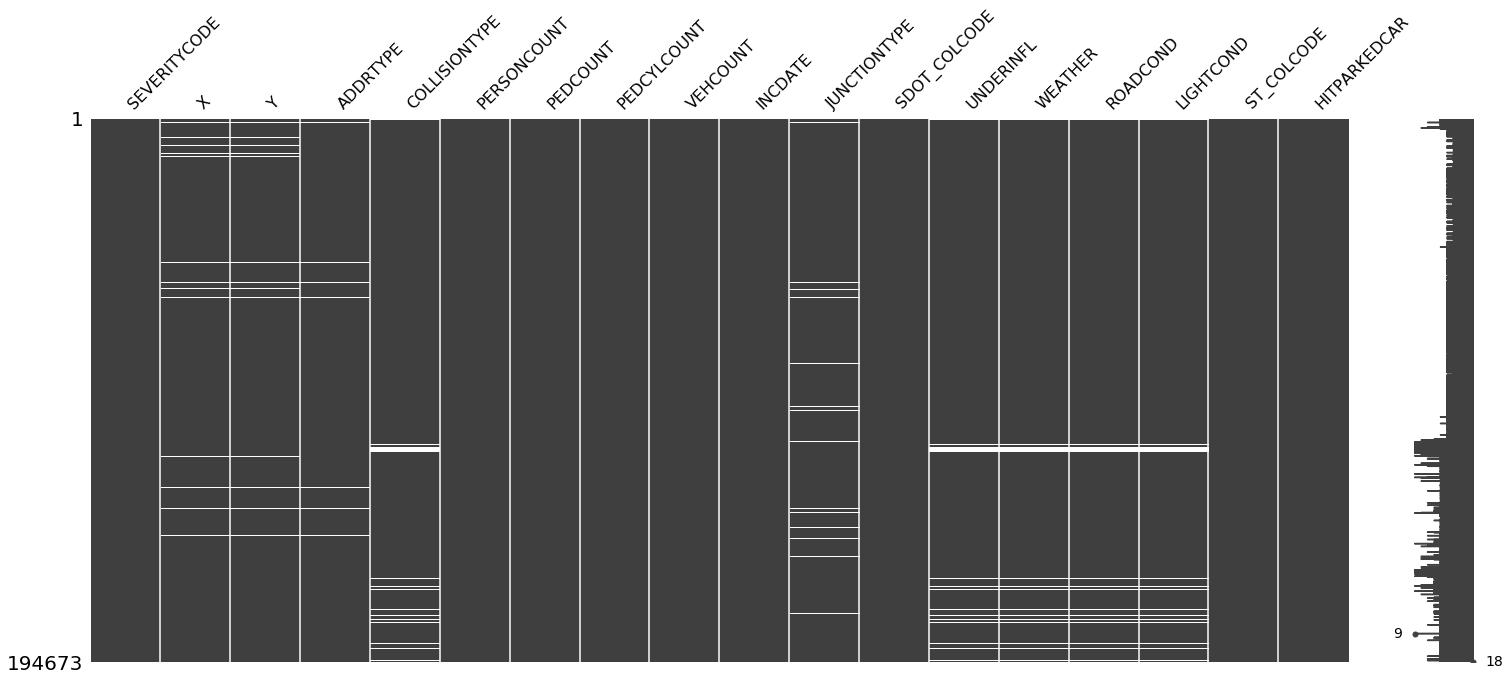

In [337]:
import missingno as msno
msno.matrix(df2) 

It seems that UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND' and 'COLLISIONTYPE'usually miss at the same time, the location information "X","Y" miss at the same time, the other values miss at random

In [597]:
df3 = df2.dropna(axis = 0)
df3.shape

(180067, 19)

In [342]:
df3.isnull().sum()

SEVERITYCODE     0
X                0
Y                0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
INCDATE          0
JUNCTIONTYPE     0
SDOT_COLCODE     0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
ST_COLCODE       0
HITPARKEDCAR     0
dtype: int64

### Correct data format

In [482]:
df3.dtypes

SEVERITYCODE       int64
X                float64
Y                float64
ADDRTYPE          object
SEVERITYDESC      object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INCDATE           object
JUNCTIONTYPE      object
SDOT_COLCODE       int64
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
ST_COLCODE        object
HITPARKEDCAR      object
dtype: object

In [609]:
df3[["SDOT_COLCODE"]] = df3[["SDOT_COLCODE"]].astype("object")

In [601]:
df3['INCDATE'] = pd.to_datetime(df3['INCDATE'])

C:\Users\Dain\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [602]:
from datetime import date
df3['year'], df3['month'],df3["weekday"] = df3['INCDATE'].dt.year, df3['INCDATE'].dt.month, df3['INCDATE'].dt.weekday
df3.dtypes

C:\Users\Dain\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


SEVERITYCODE                   int64
X                            float64
Y                            float64
ADDRTYPE                      object
SEVERITYDESC                  object
COLLISIONTYPE                 object
PERSONCOUNT                    int64
PEDCOUNT                       int64
PEDCYLCOUNT                    int64
VEHCOUNT                       int64
INCDATE          datetime64[ns, UTC]
JUNCTIONTYPE                  object
SDOT_COLCODE                  object
UNDERINFL                     object
WEATHER                       object
ROADCOND                      object
LIGHTCOND                     object
ST_COLCODE                    object
HITPARKEDCAR                  object
year                           int64
month                          int64
weekday                        int64
dtype: object

## Explotary Data Analysis

In [606]:
import seaborn as sns

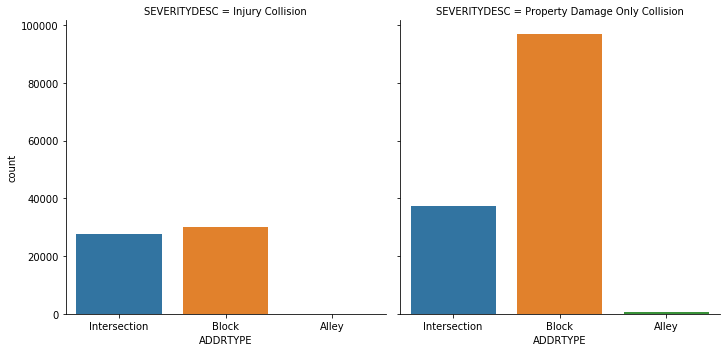

In [612]:
sns.catplot(x = "ADDRTYPE", data = df2, kind = "count",  col= "SEVERITYDESC")

# Show plot
plt.show()

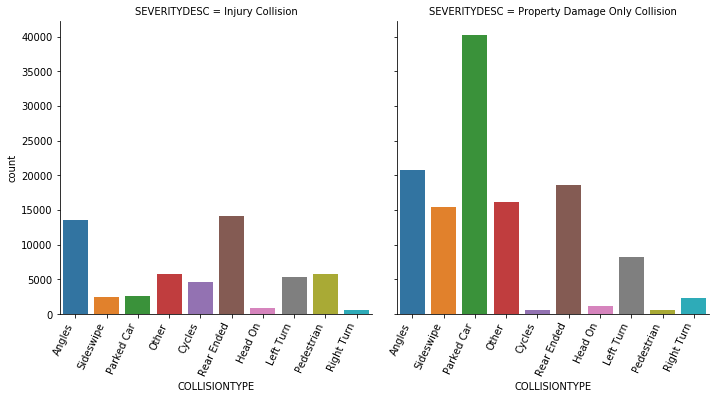

In [611]:
chart = sns.catplot(x = "COLLISIONTYPE", data = df3, kind = "count",  col= "SEVERITYDESC")
chart.set_xticklabels(rotation=65, horizontalalignment='right')

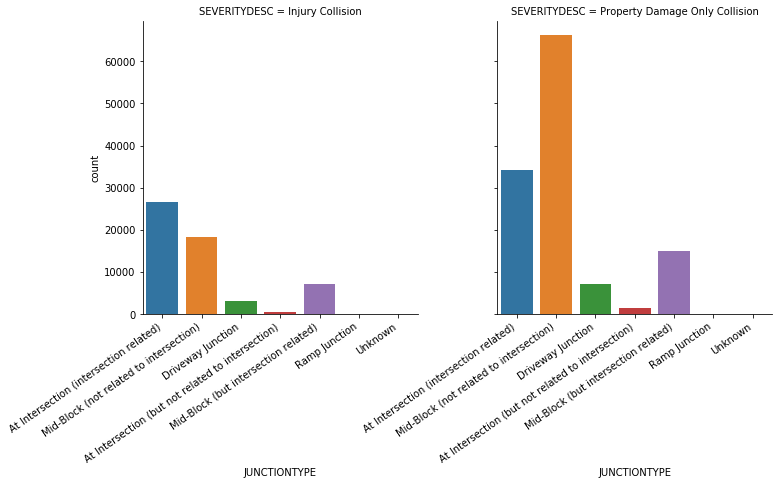

In [614]:
chart1 = sns.catplot(x = "JUNCTIONTYPE", data = df3, kind = "count",  col= "SEVERITYDESC")
chart1.set_xticklabels(rotation=35, horizontalalignment='right')

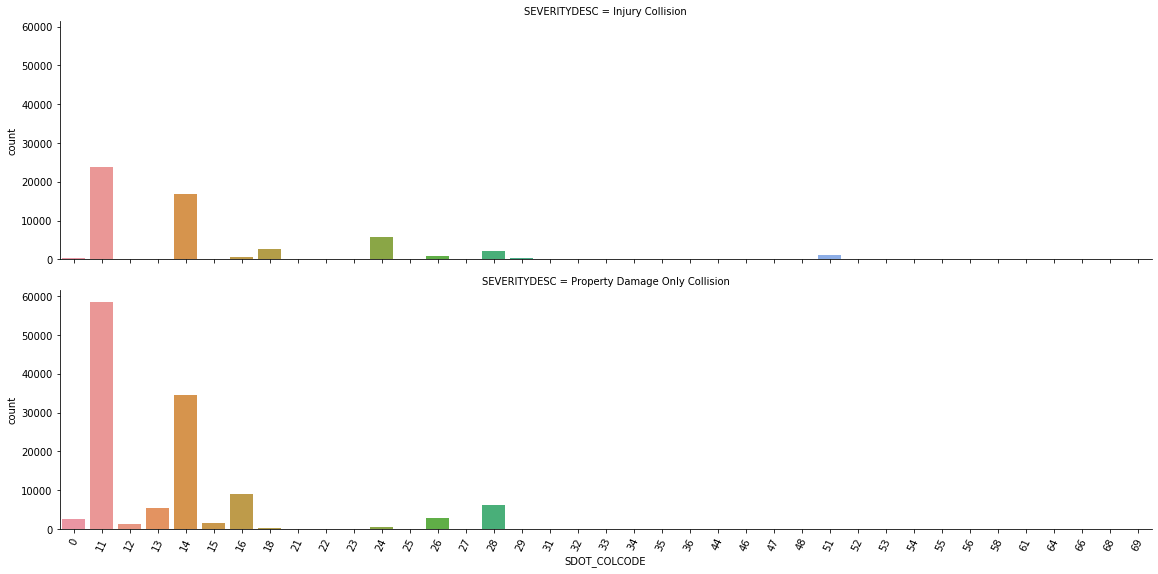

In [615]:
chart2 = sns.catplot(x = "SDOT_COLCODE", data = df3, kind = "count",  row= "SEVERITYDESC",aspect=4,height=4)
chart2.set_xticklabels(rotation=65)

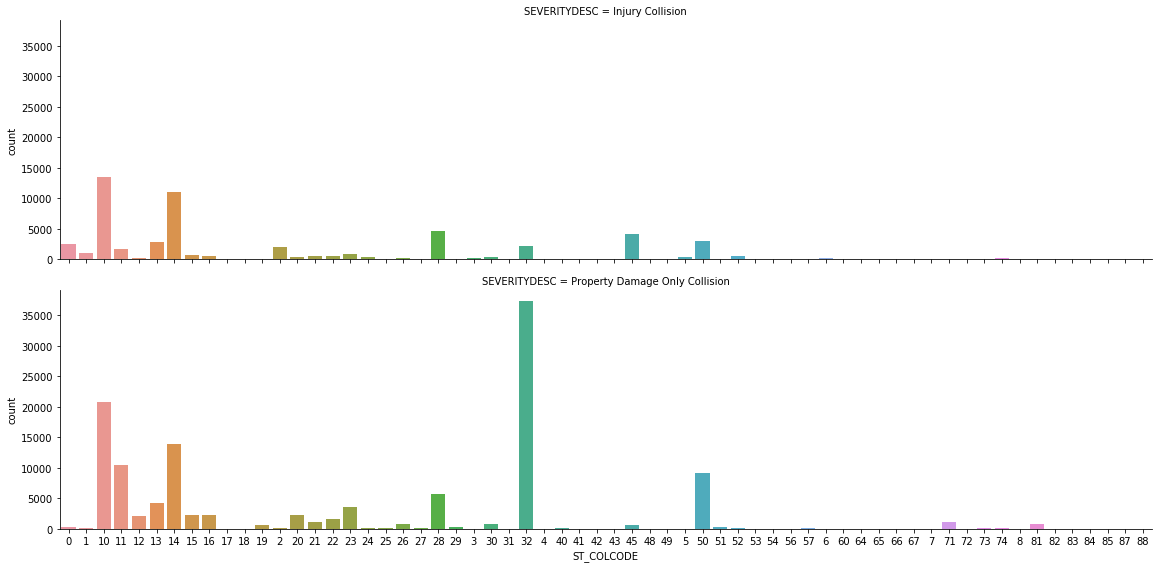

In [619]:
chart3 = sns.catplot(x = "ST_COLCODE", data = df3, kind = "count",  row= "SEVERITYDESC",aspect=4,height=4)

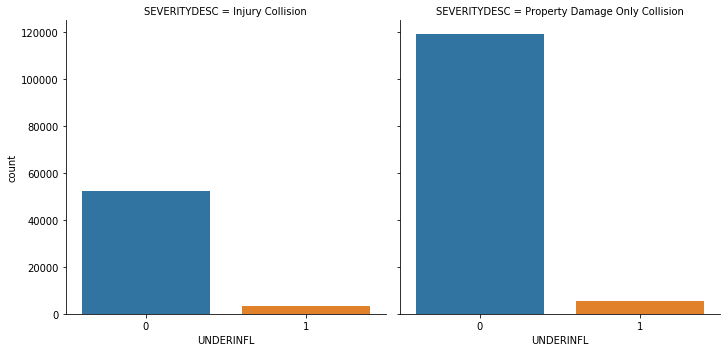

In [622]:
chart4 = sns.catplot(x = "UNDERINFL", data = df3, kind = "count",  col= "SEVERITYDESC")

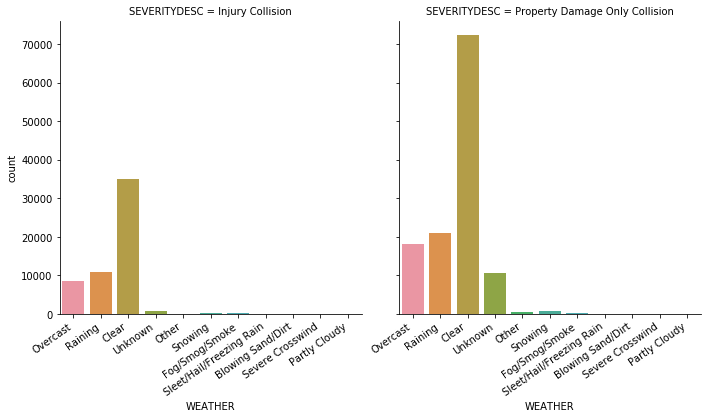

In [623]:
chart5 = sns.catplot(x = "WEATHER", data = df3, kind = "count",  col= "SEVERITYDESC")
chart5.set_xticklabels(rotation=35, horizontalalignment='right')

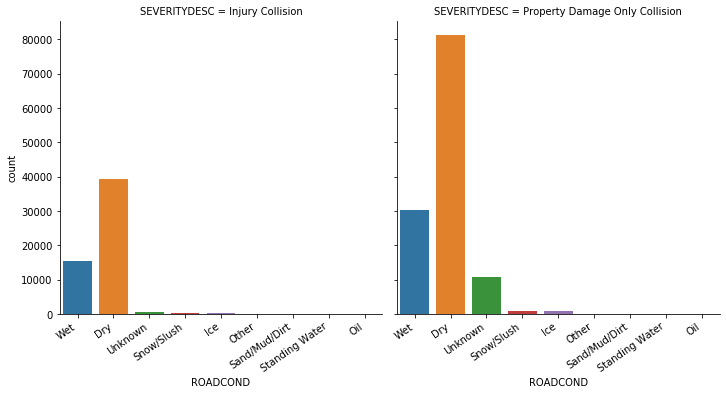

In [624]:
chart6 = sns.catplot(x = "ROADCOND", data = df3, kind = "count",  col= "SEVERITYDESC")
chart6.set_xticklabels(rotation=35, horizontalalignment='right')

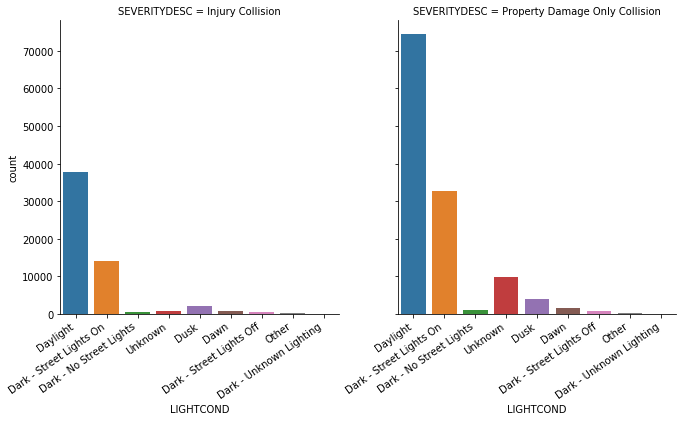

In [625]:
chart7 = sns.catplot(x = "LIGHTCOND", data = df3, kind = "count",  col= "SEVERITYDESC")
chart7.set_xticklabels(rotation=35, horizontalalignment='right')

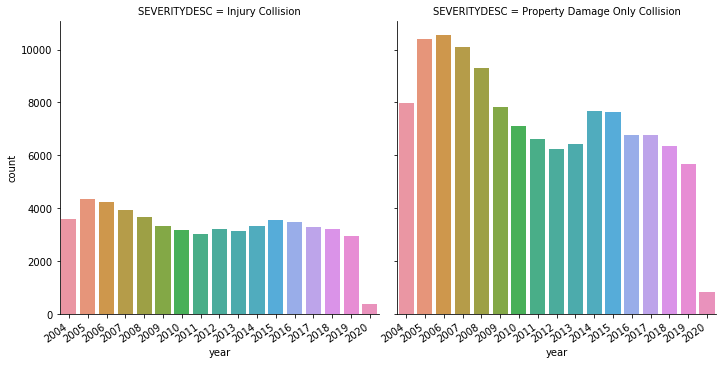

In [629]:
chart9 = sns.catplot(x = "year", data = df3, kind = "count",  col= "SEVERITYDESC")
chart9.set_xticklabels(rotation=35, horizontalalignment='right')

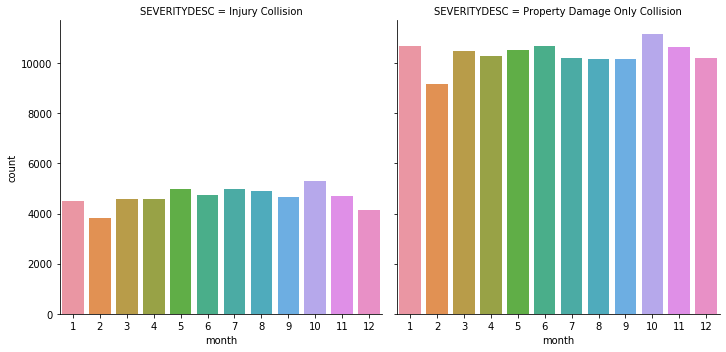

In [627]:
chart10 = sns.catplot(x = "month", data = df3, kind = "count",  col="SEVERITYDESC")

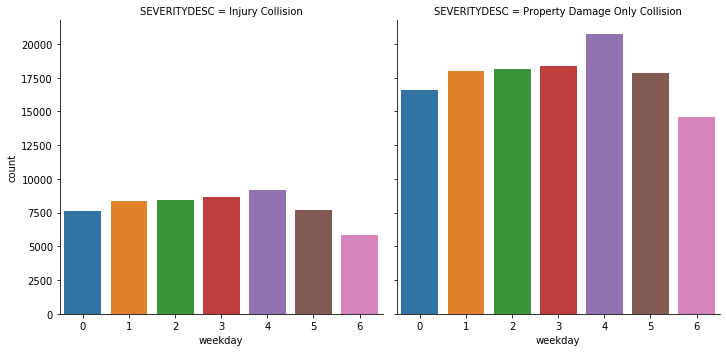

In [628]:
chart11 = sns.catplot(x = "weekday", data = df3, kind = "count",  col= "SEVERITYDESC")

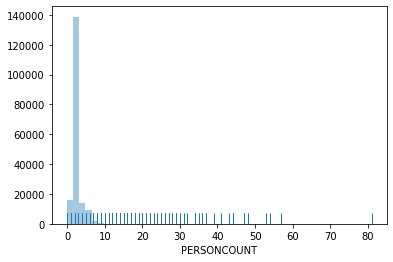

In [416]:
sns.distplot(df3["PERSONCOUNT"],kde=False, rug=True)

## Show accident on map

In [418]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: ...working... done

# All requested packages already installed.



In [491]:
df_2020 = df3[(df3["year"] == 2020)]
df_2020.shape

(1236, 22)

In [494]:
# Seattle latitude and longitude values
latitude = 47.6
longitude = -122.3

# create map and display it
seattle_map = folium.Map(location=[latitude, longitude], zoom_start=12)

In [493]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
seattle_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_2020.Y, df_2020.X, df_2020.SEVERITYDESC):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
seattle_map

## Data Preparing

In [552]:
df3a = df3.drop(["SEVERITYDESC","INCDATE","year","month","weekday"],axis = 1)

### Creat dummy variables

In [554]:
df4 = pd.get_dummies(data=df3a, columns=['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE','WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR'])
df4.shape

(180067, 60)

In [555]:
df4.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,UNDERINFL,ST_COLCODE,...,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,HITPARKEDCAR_N,HITPARKEDCAR_Y
INCKEY,,,,,,,,,,,,,,,,,,,,,
1307,2,-122.323148,47.703140,2,0,0,2,11,0,10,...,0,0,0,0,1,0,0,0,1,0
52200,1,-122.347294,47.647172,2,0,0,2,16,0,11,...,0,1,0,0,0,0,0,0,1,0
26700,1,-122.334540,47.607871,4,0,0,3,14,0,32,...,0,0,0,0,1,0,0,0,1,0
1144,1,-122.334803,47.604803,3,0,0,3,11,0,23,...,0,0,0,0,1,0,0,0,1,0
17700,2,-122.306426,47.545739,2,0,0,2,11,0,10,...,0,0,0,0,1,0,0,0,1,0


### Fix the problem of imbalance labels

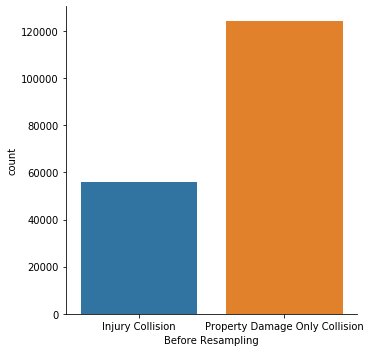

In [658]:
ax = sns.catplot(x = "SEVERITYDESC", data = df3, kind = "count")
ax.set(xlabel='Before Resampling')

In [557]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df4[df4.SEVERITYCODE==1]
df_minority = df4[df4.SEVERITYCODE==2]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=126270,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df5 = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df5.SEVERITYCODE.value_counts()

2    126270
1    124258
Name: SEVERITYCODE, dtype: int64

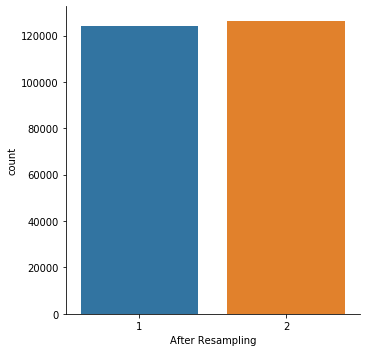

In [660]:
ax2 = sns.catplot(x = "SEVERITYCODE", data = df5, kind = "count")
ax2.set(xlabel='After Resampling')

In [558]:
df5.shape

(250528, 60)

In [561]:
y = df5.SEVERITYCODE
X = df5.drop('SEVERITYCODE', axis=1)

### Split data into training and testing dataset

In [565]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [567]:
print(X_trainset.shape)
print(X_testset.shape)
print(y_trainset.shape)
print(y_testset.shape)

(175369, 59)
(75159, 59)
(175369,)
(75159,)


## Build DecisionTree Model

In [674]:
from sklearn.tree import DecisionTreeClassifier

decTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
decTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [675]:
decTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Evaluate the decision tree model

In [676]:
predTree = decTree.predict(X_testset)

In [677]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7103074814726114


In [681]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

print("DecisionTree's Accuracy: ", metrics.accuracy_score(y_testset, predTree))
print("DecisionTree's F1-Score: ", f1_score(y_testset, predTree, average='weighted'))

DecisionTree's Accuracy:  0.7103074814726114
DecisionTree's F1-Score:  0.7051338029889037


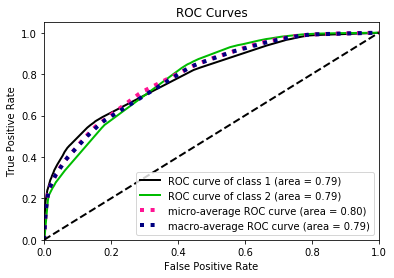

In [592]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_testset
y_probas_tree = decTree.predict_proba(X_testset)
skplt.metrics.plot_roc(y_true, y_probas_tree)
plt.show()

## Build Linear Regression Model

In [575]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset,y_trainset)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Evaluate the linear Regression Model

In [576]:
yhat_lr = LR.predict(X_testset)
yhat_prob_lr = LR.predict_proba(X_testset)
yhat_lr[0:5]
yhat_prob_lr[0:5]

array([[0.62621773, 0.37378227],
       [0.39570828, 0.60429172],
       [0.11472602, 0.88527398],
       [0.35688997, 0.64311003],
       [0.95161635, 0.04838365]])

In [662]:
from sklearn.metrics import log_loss
print("Logistic Regression's Accuracy: ", metrics.accuracy_score(y_testset, yhat_lr))
print("Logistic Regression's F1-Score: ", f1_score(y_testset, yhat_lr, average='weighted'))
print("Logistic Regression's LogLoss : ", log_loss(y_testset, yhat_prob_lr))

Logistic Regression's Accuracy:  0.7038012746311154
Logistic Regression's F1-Score:  0.7004139410689796
Logistic Regression's LogLoss :  0.5445183257641134


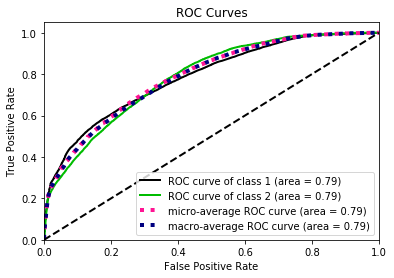

In [593]:
y_true = y_testset
y_probas = yhat_prob_lr
skplt.metrics.plot_roc(y_true, y_probas)
plt.show()